# 넘파이를 이용한다. 

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index ={}
for sample in samples:
  for word in sample.split():
    print(word)
    if word not in token_index:
      token_index[word]= len(token_index)+1 # 인덱스 0는 사용하지 않음 사전형으로 들어감 
      print(token_index)

max_length = 10 # 각 샘플에서 max_lenth까지 단어만 사용 the가 두개
results = np.zeros((len(samples), max_length, max(token_index.values())+1)) # 3차원 (2,10,11) 문장 2개, 단어는 가로 10개까지, 문장길이는  세로 11까지
print(len(samples))
for i, sample in enumerate(samples): # 각한 문장이 나완다. 
  for j, word in list(enumerate(sample.split()))[:max_length]: # 왜 굳이 각 단어 글자수 10개 제한 ? - 걍넣음 
    index = token_index.get(word) # 인덱스가 칼럼에 들어가니 칼럼 아닌가? 
    results[i,j,index] = 1.


The
{'The': 1}
cat
{'The': 1, 'cat': 2}
sat
{'The': 1, 'cat': 2, 'sat': 3}
on
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4}
the
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5}
mat.
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6}
The
dog
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7}
ate
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8}
my
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9}
homework.
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
2


In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

# 케라스을 이용한 ohe(원핫 인코딩)

In [ ]:
from keras.preprocessing.text import Tokenizer
samples=['The cat sat on the mat', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)# 가장 빈도가 높은 1000개의 단어만 선택
tokenizer.fit_on_texts(samples) # 단어 인덱스 구축 /문자데이터 받아서 리스크 형태로 변환
print(tokenizer)
sequences =tokenizer.texts_to_sequences(samples)# 문자열을 정수 인덱스의 리스트로 변환 / 숫자를 시퀀스로 변환 
ohe_results = tokenizer.texts_to_matrix(samples,mode='binary')# 바이너리로 분류 원핫인코딩이니까 
word_index = tokenizer.word_index # 키와 값을 포함하는 딕셔너리 반환 
print('Found %s unique tokens.' %len(word_index))

Found 9 unique tokens.


In [ ]:
print(word_index)

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
ohe_results[0, :10]

array([0., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

#Embedding
- 단어와 벡터를 연관짓는 강력하고 인기 있는 또 다른 방법은 단어 임베딩이라는 밀집 단어 벡터를 사용하는 것이다. 
- 원-핫 인코딩으로 만든 벡터는 희소하고(대부분 0으로 채워집니다) 고차원이다(어휘 사전에 있는 단어의 수와 차원이 같다). 
- 반면 단어 임베딩은 저차원의 실수형 벡터이다(희소 벡터의 반대인 밀집 벡터이다). 그림 6-2를 참고
- 원-핫 인코딩으로 얻은 단어 벡터와 달리 단어 임베딩은 데이터로부터 학습된다. - 보통 256차원, 512차원 또는 큰 어휘 사전을 다룰 때는 1,024차원의 단어 임베딩을 사용한다.
- 반면 원-핫 인코딩은 (20,000개의 토큰으로 이루어진 어휘 사전을 만들려면) 20,000차원 또는 그 이상의 벡터일 경우가 많다. 
- 따라서 단어 임베딩이 더 많은 정보를 적은 차원에 저장한다.
* (문서 분류나 감성 예측과 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습합니다. 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습합니다.
* 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드합니다. 이를 사전 훈련된 단어 임베딩이라고 합니다.

- 실제 단어 임베딩 공간에서 의미 있는 기하학적 변환의 일반적인 예는 '성별' 벡터와 '복수(plural)' 벡터ㅇ이다. 
- 예를 들어 'king' 벡터에 'female' 벡터를 더하면 'queen' 벡터가 된다. 'plural' 벡터를 더하면 'kings'가 된다. 
- 단어 임베딩 공간은 전형적으로 이런 해석 가능하고 잠재적으로 유용한 수천 개의 벡터를 특성으로 가진다.
- 사람의 언어를 완벽하게 매핑해서 어떤 자연어 처리 작업에도 사용할 수 있는 이상적인 단어 임베딩 공간은 아직 가능하지 않다. 사람의 언어에도 그런 것은 없다. 
- 세상에는 많은 다른 언어가 있고 언어는 특정 문화와 환경을 반영하기 때문에 서로 동일하지 않다. 
- 실제로 좋은 단어 임베딩 공간을 만드는 것은 문제에 따라 크게 달라진다. - 영어로 된 영화 리뷰 감성 분석 모델을 위한 완벽한 단어 임베딩 공간은 영어로 된 법률 문서 분류 모델을 위한 완벽한 임베딩 공간과 다를 것 이다. 특정 의미 관계의 중요성이 작업에 따라 다르기 때문이다.
- 따라서 새로운 작업에는 새로운 임베딩을 학습하는 것이 타당하다. 
- 다행히 역전파를 사용해 쉽게 만들 수 있고 케라스를 사용하면 더 쉽다. `Embedding` 층의 가중치를 학습하면 된다.

- feature vector화하고  단어임베딩 행렬 곱 연산 계속하고 가중치를 계속 업데이트 


- Embedding이란 2차원의 도표가 있을 때 x축은 남자 y축은 지위로 하면 남자 왕 여왕 등을 구분할 수 있게 
- 숫자화 한다. 만약 x,y,z등 여러 축이 있다면 더 잘분류할 수 있다.  

In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(1000,64)

# IMDB 영화 감성 예측

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

In [ ]:
from keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000 # 특성으로 사용할 단어 숫자
max_length = 20  # 텍스트 단어 갯수 

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(x_train)
print(x_train.shape) # 25000개의 리스트가 있음 

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen= max_length)  # 20개의 정수 tensor로 cut또는 padding 패딩한 부분은 0으로 채워지나요- 대부분 20개 넘지만 , 20자 안넘는 것은 0으로 채움 
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen= max_length)  # 20개의 정수 tensor로 cut또는 padding

x_train.shape


[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

(25000, 20)

In [ ]:
model = Sequential()
model.add(Embedding(1000,8,input_length = max_length)) # 1000개의 단어를 쓰고 8은 embedding dimensionality 리스트 길이 단어들 20개까지 
# 출력 크기는 (samples, maxlen, 8)
# 3D 임베딩 텐서를 (samples, maxlen, 8) 크기의 2d tensor로 펼침
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(x_train,y_train, epochs= 10, batch_size = 32, validation_split = 0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             8000      
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 5s 3ms/step - loss: 0.6697 - acc: 0.6228 - val_loss: 0.6239 - val_acc: 0.6956
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5635 - acc: 0.7286 - val_loss: 0.5478 - val_acc: 0.7156
Epoch 3/10
625/625 [==============================] - 

# RNN

In [ ]:
# 길어지면 시간이 많이 걸린다. 

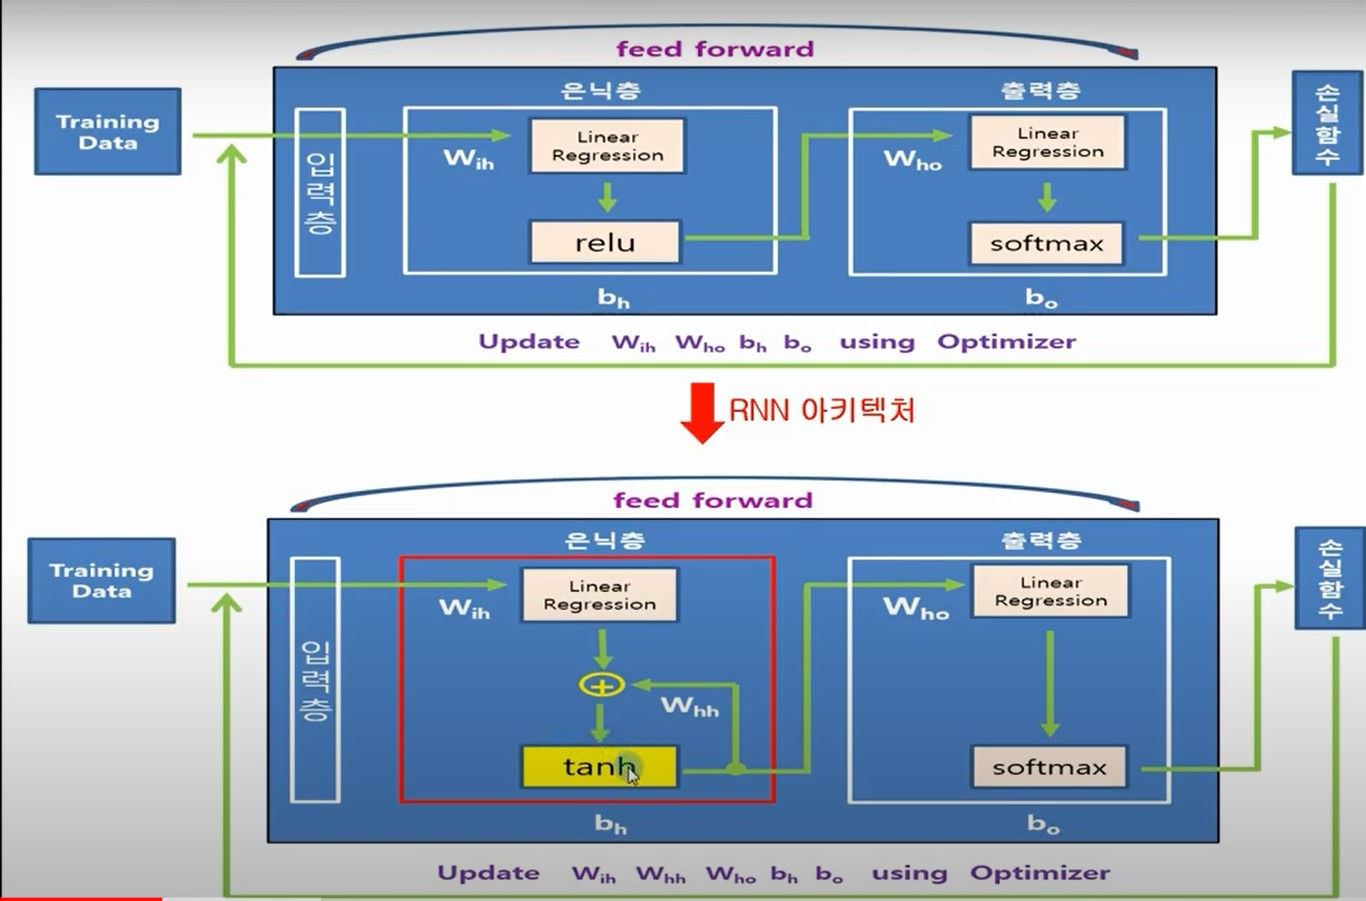

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/rnn/rnn1.jpg')
# 위에는 기본 밑에는 rnn이다. 

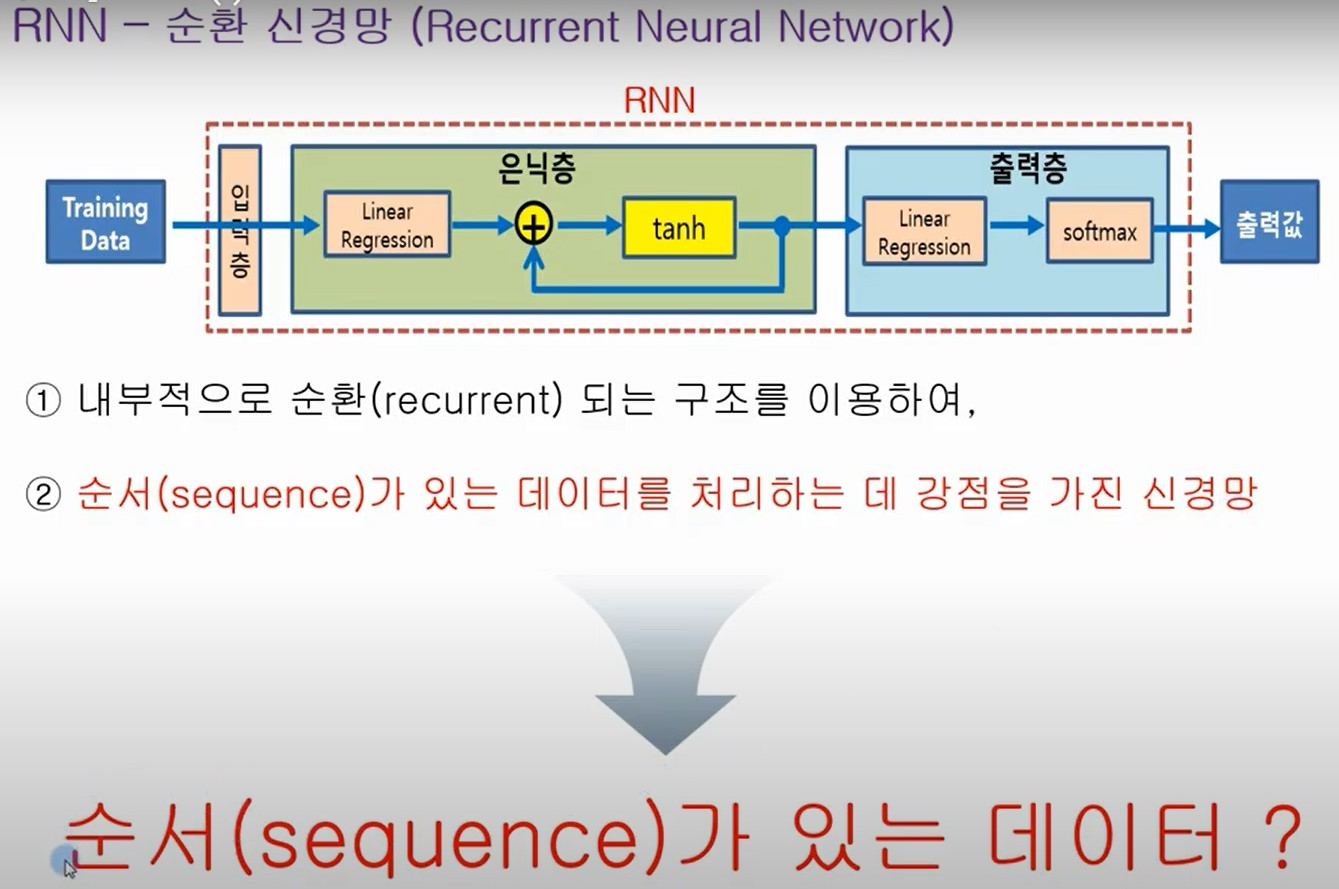

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/rnn/rnn2.jpg')

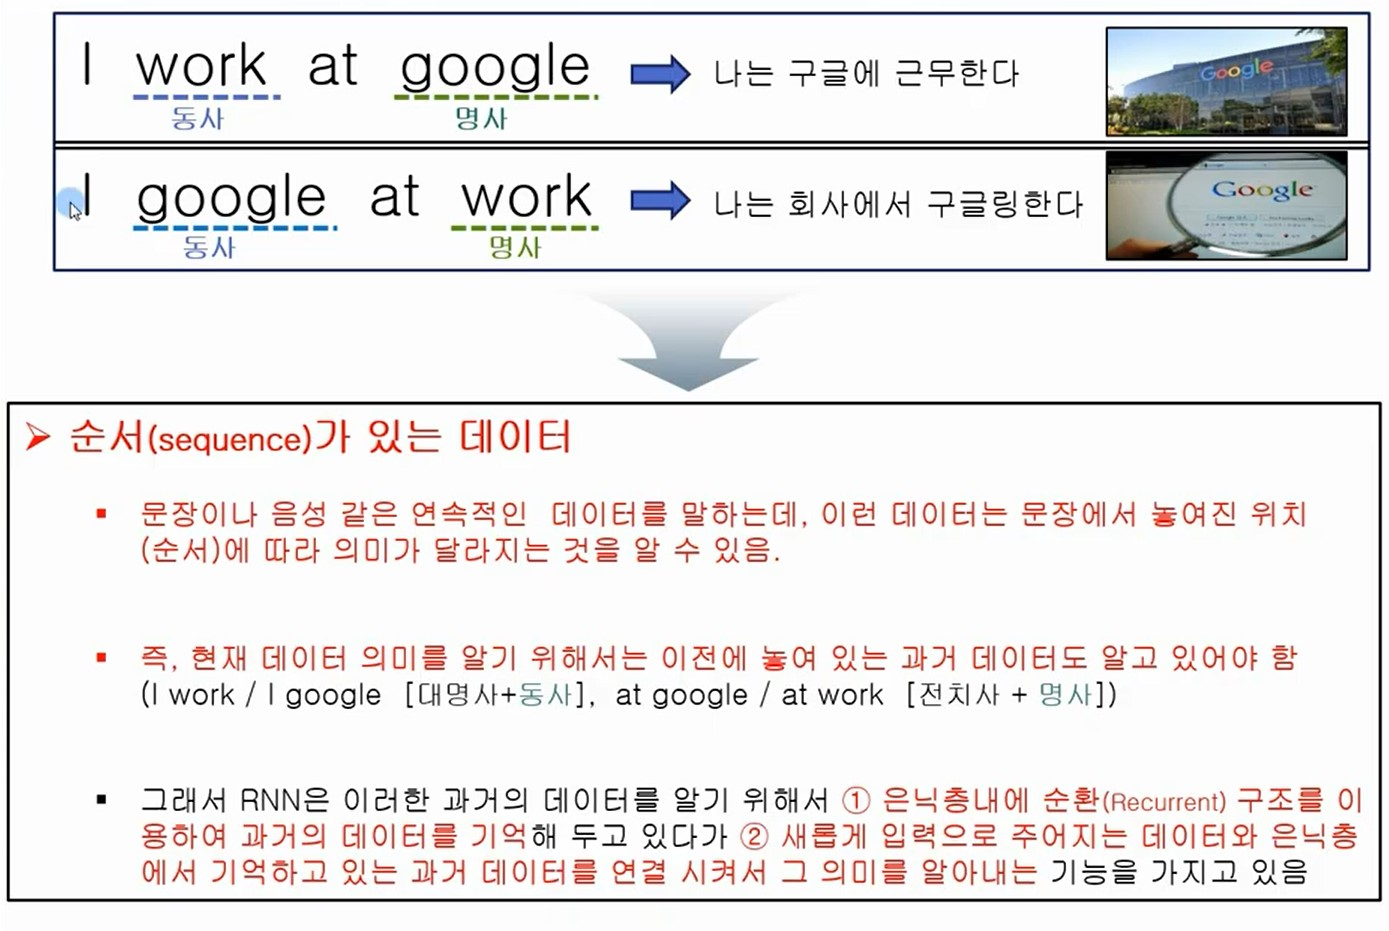

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/rnn/rnn3.jpg')

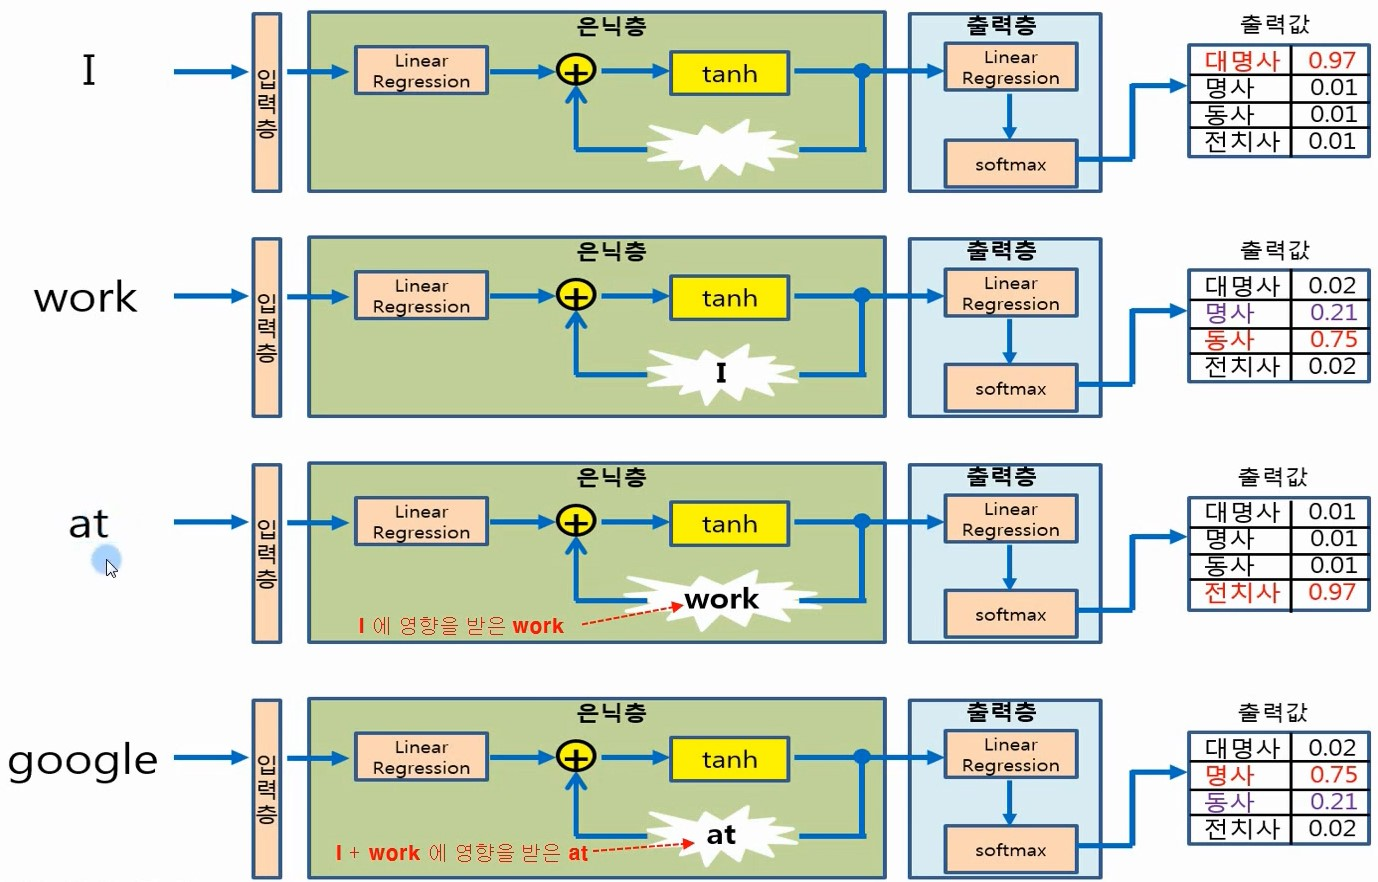

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/rnn/rnn4.jpg')

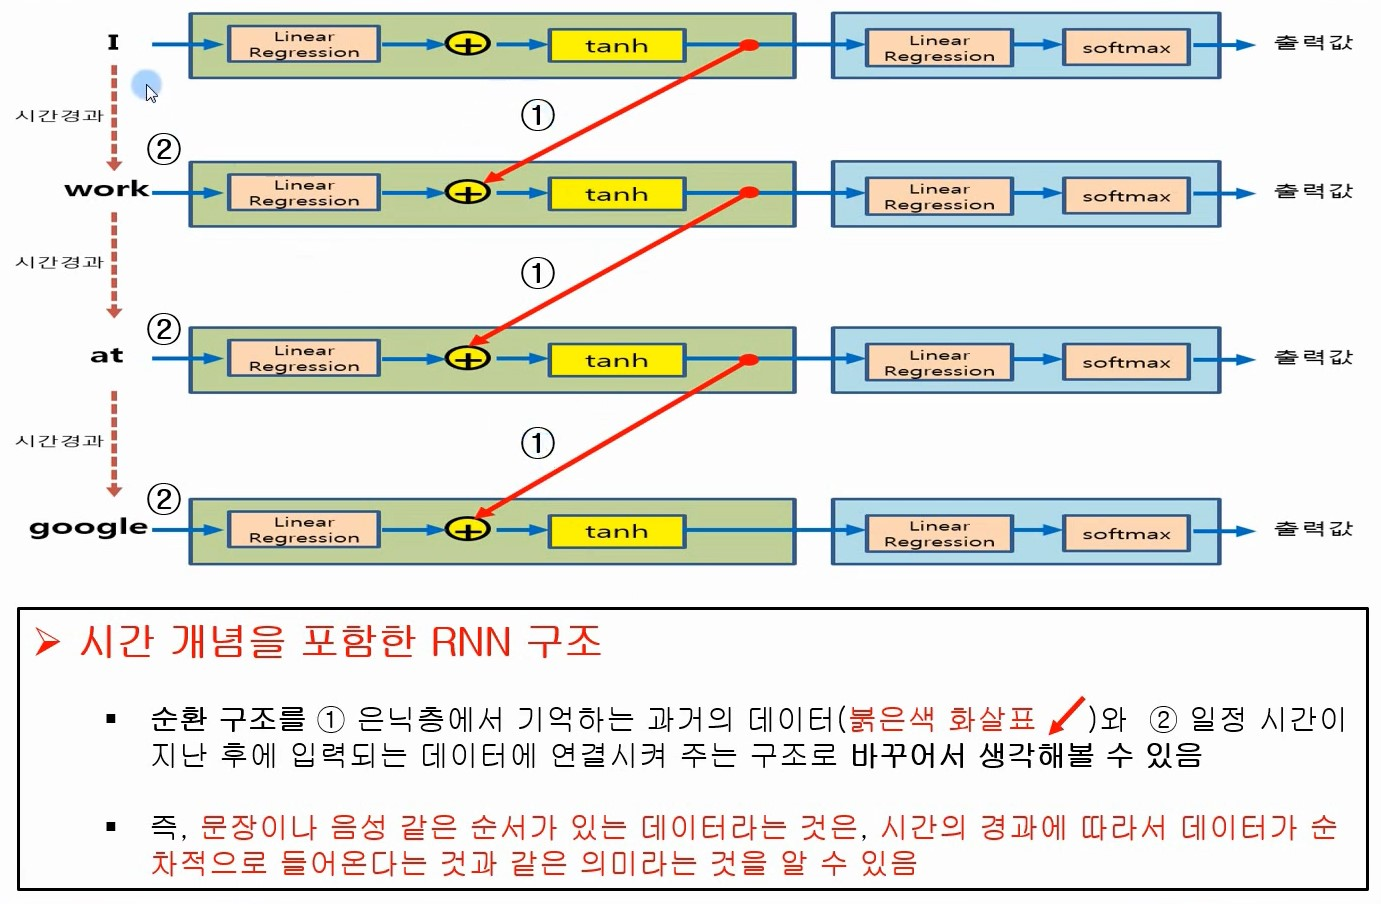

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/rnn/rnn5.jpg')

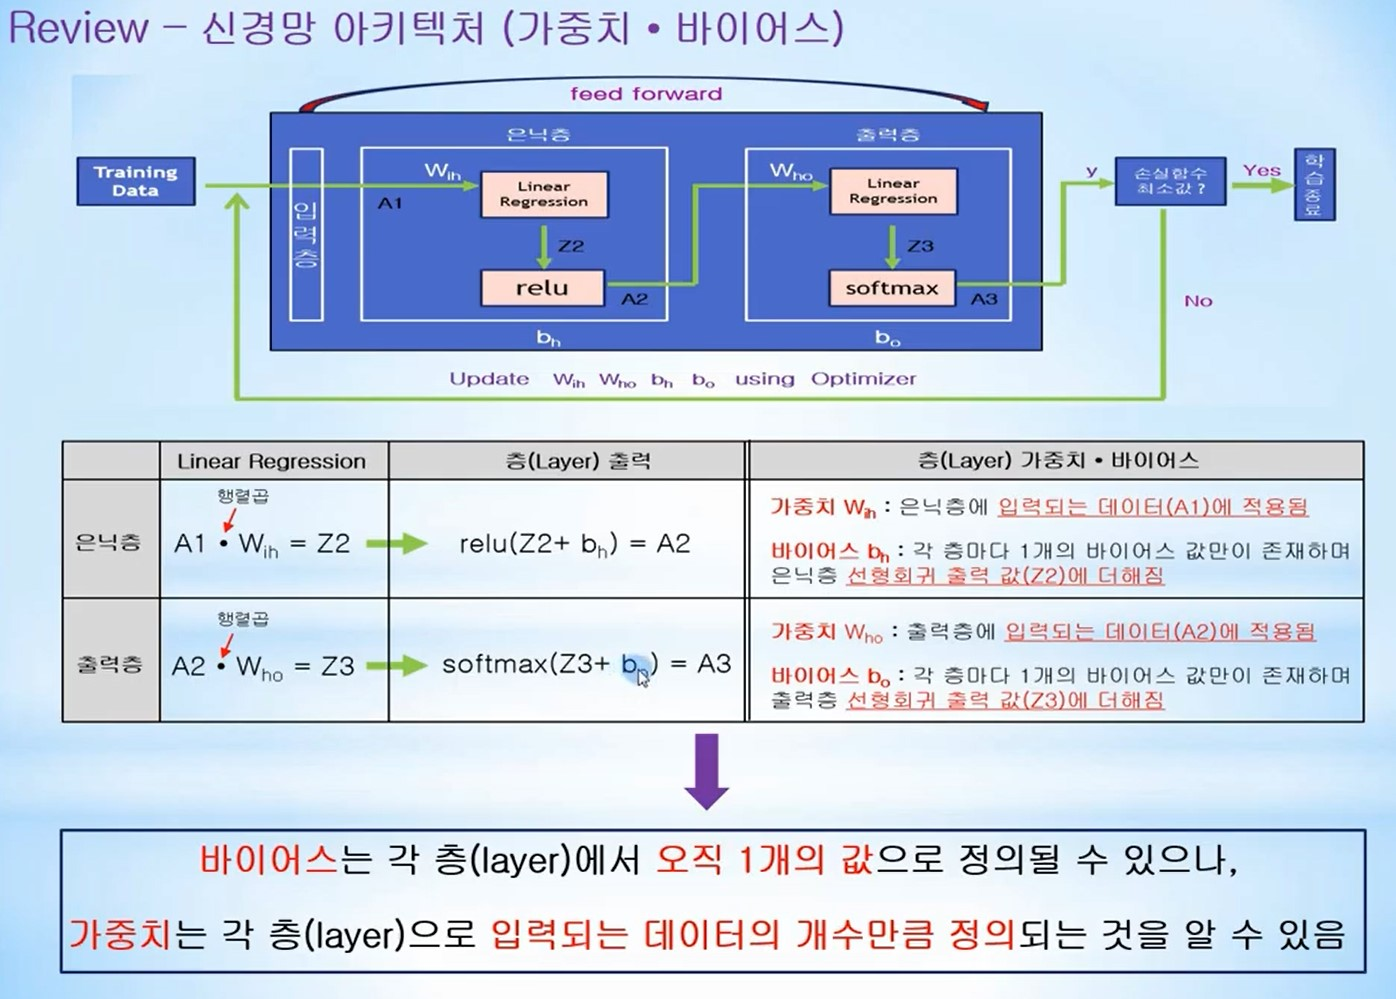

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/rnn/rnn6.jpg')

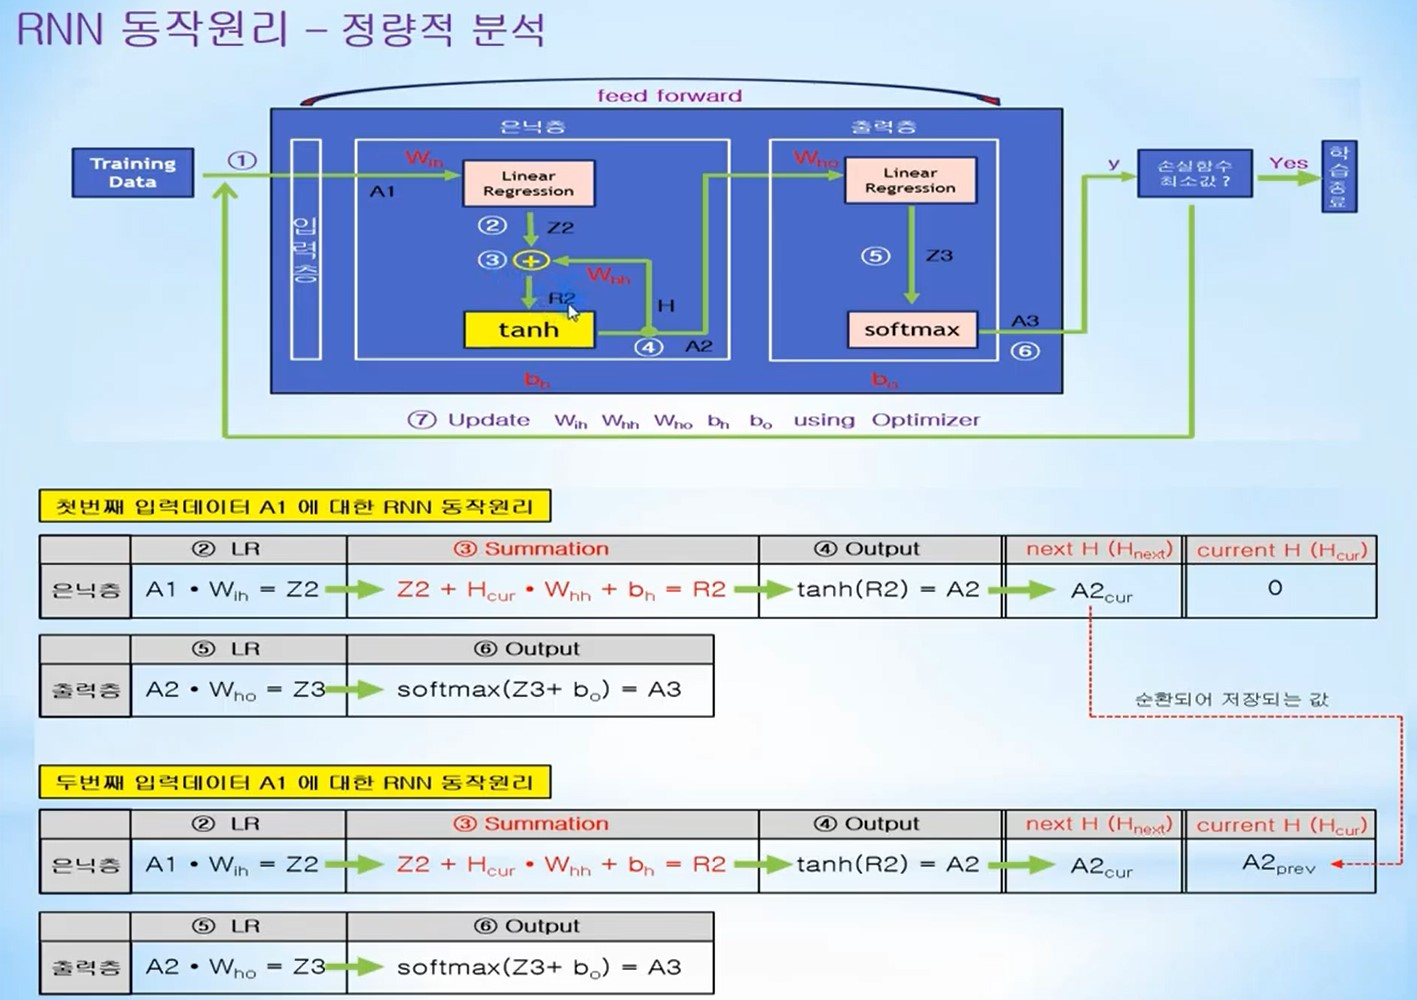

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/rnn/rnn8.jpg')

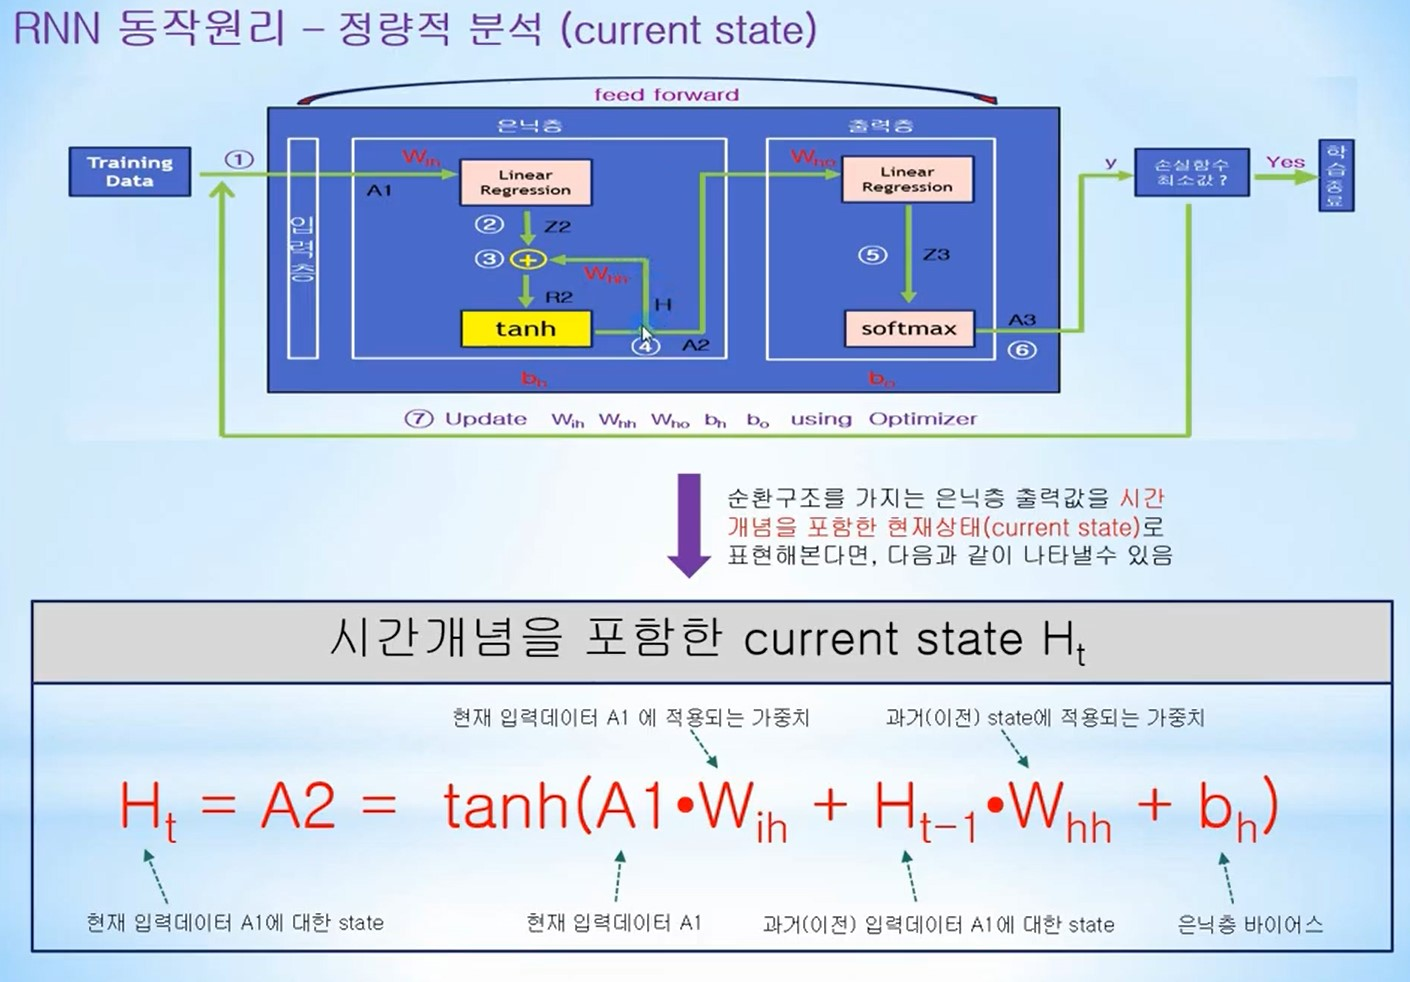

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/rnn/rnn9.jpg')
# t-1에대한 가중치도 처리된다. 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망
  - 입력층 → 은닉층 → 출력층으로 이어지는 단방향 구조
  - 이전 스텝의 출력이 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조
  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  
  - 현재 상태가 이전 상태에 종속


In [ ]:
# 마지막 timestep만 출력 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 전체 상태 시퀀스를 반환 
model = Sequential()
model.add(Embedding(10000,32))
model.summary()

In [ ]:
# 전체 상태 시퀀스를 반환 
model = Sequential()


# 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
# 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
# input_length = 입력 시퀀스의 길이

model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


# IMDB 데이터셋 

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features =100000
maxlen =500
batch_size=32

(input_train, y_train), (input_test, y_test)= imdb.load_data(num_words=max_features) # 자주 쓰이는 단어 100000만개 
print(len(input_train), len(input_test))

25000 25000


In [ ]:
# 시퀀스 패딩

In [ ]:
input_train = sequence.pad_sequences(input_train, maxlen= maxlen)  # 500개의 정수 tensor로 cut또는 padding
input_test = sequence.pad_sequences(input_test, maxlen= maxlen)  # 500개의 정수 tensor로 cut또는 padding

input_train.shape

(25000, 500)

In [ ]:
# embedding 층과 simple rnn층을 사용하여 순환 네트워크 훈련 오래걸린다.  

In [ ]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(input_train,y_train, epochs= 5, batch_size = 128, validation_split = 0.2)


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, None, 32)          3200000   
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,202,113
Trainable params: 3,202,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 83s 526ms/step - loss: 0.5972 - acc: 0.6633 - val_loss: 0.4265 - val_acc: 0.8144
Epoch 2/5
157/157 [==============================] - 84s 538ms/step - loss: 0.3500 - acc: 0.8561 - val_loss: 0.4204 - val_acc: 0.8132
Epoch 3/5
157/157 [====================

In [ ]:
model = Sequential()
model.add(Embedding(1000,8,input_length = max_length)) # 8은 embedding dimensionality
# 출력 크기는 (samples, maxlen, 8)
# 3D 임베딩 텐서를 (samples, maxlen, 8) 크기의 2d tensor로 펼침
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(input_train,y_train, epochs= 10, batch_size = 32, validation_split = 0.2)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 20, 8)             8000      
                                                                 
 flatten_3 (Flatten)         (None, 160)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 161       
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: ignored

In [ ]:
#model summary

In [ ]:
#훈련 검증의 손실과 정확도 시각화 

# 원본 IMDB

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  9282k      0  0:00:08  0:00:08 --:--:-- 15.4M


In [ ]:
ls

aclImdb/  aclImdb_v1.tar.gz  drive/  sample_data/


In [ ]:
!rm -r aclImdb/train/unsup # 제거하는 명령어

In [ ]:
!cat aclImdb/train/pos/4077_10.txt # 한줄 불러오기 

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

In [ ]:
import os 

#경로(패스)명 조작에 관한 처리를 모아둔 모듈로써 구현되어 있는 함수의 하나이다. 인수에 전달된 2개의 문자열을 결합하여, 
#1개의 경로로 할 수 있다. os.path.jon()을 사용하기 위해서는, os 모듈을 import할 필요가 있다

imdb_dir ='./aclImdb'
train_dir = os.path.join(imdb_dir, 'train') # 원본 문장으로 되있는 것 불러와서 train, label로 나눈다. 

labels=[]
texts =[]

for label_type in ["neg", "pos"]: # 라벨을 0이냐 1이냐 감성분석한다. 
  dir_name =os.path.join(train_dir, label_type) # label 타입을 neg pos로 분류 
  print(dir_name) # 파일 폴더를 만든 것이다. 
  for fname in os.listdir(dir_name): # os.listdir은 지정폴더내 모든 파일을 리턴한다. 
    if fname[-4:] ==".txt":
      f =open(os.path.join(dir_name, fname), encoding='utf-8')
      texts.append(f.read()) # fname읽어서 texts에 넣음 
      f.close()
      if label_type =="neg":
        labels.append(0)
      else:
        labels.append(1)


./aclImdb/train/neg
./aclImdb/train/pos


In [ ]:
texts[0] #사실상 neg와 pos 읽은 것 

'I basically found Eden\'s Curve to be a very poorly constructed that made it difficult to watch. However, there is something I must say about how the director captured something about the atmosphere of the early 70\'s in the choice of settings and clothing. The "back to the earth" philosophy and the interest in sexual exploration and drugs that was not dramatically decadent, as portrayed in many later versions of the 70\'s was right on, as was the "don\'t ask don\'t tell" pseudo-liberalism of the fraternity made up of east-coast intellectuals, except that I would have thought this was more likely of a New England school rather than one in Virginia, where I imagine the "good ole boy" mentality still dominated even elitist schools like this one. Another thing I appreciated and could relate to is that this was a time when homosexuality was not linked so much to leathermen or drag queens and I appreciated some homosexual roles not related to these terribly overused images. I felt it was v

In [ ]:
# 데이터 토근화
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen =100
training_samples =200# traing samples를 소규모로 잡음 
validation_samples =10000
max_words =10000 # 가장 많이 쓰는 단어 10000개 

tokenizer =Tokenizer(num_words =max_words) # 토크나이저로 토근화 
tokenizer.fit_on_texts(texts) # text에 있는 것 숫자로  
sequences = tokenizer.texts_to_sequences(texts) # 텍스트를 숫자있는 것을 모여서  시퀀스로 바꿈 

word_index =tokenizer.word_index # 워드인덱스는 값이랑 인덱스 반환 
len(word_index) #워드 인덱스 길이 
# 자주쓰이는 단어 10000개가 숫자가 되고 그것의 총개수가 word index화 된다.?

88582

In [ ]:
sequences[0]

[10,
 688,
 255,
 5,
 27,
 3,
 52,
 858,
 4449,
 12,
 90,
 9,
 875,
 5,
 103,
 187,
 47,
 6,
 139,
 10,
 212,
 132,
 41,
 86,
 1,
 164,
 1992,
 139,
 41,
 1,
 838,
 4,
 1,
 399,
 1693,
 8,
 1,
 1095,
 4,
 2766,
 2,
 3950,
 1,
 142,
 5,
 1,
 699,
 4010,
 2,
 1,
 599,
 8,
 859,
 4632,
 2,
 1664,
 12,
 13,
 21,
 6702,
 14,
 996,
 8,
 108,
 300,
 2052,
 4,
 1,
 1693,
 13,
 205,
 20,
 14,
 13,
 1,
 89,
 939,
 89,
 373,
 3899,
 4,
 1,
 90,
 53,
 4,
 2916,
 5171,
 546,
 12,
 10,
 59,
 25,
 194,
 11,
 13,
 50,
 1326,
 4,
 3,
 159,
 1822,
 392,
 244,
 71,
 28,
 8,
 4558,
 118,
 10,
 835,
 1,
 49,
 427,
 5674,
 128,
 6259,
 57,
 5844,
 37,
 11,
 28,
 157,
 151,
 10,
 2521,
 2,
 97,
 2186,
 5,
 6,
 12,
 11,
 13,
 3,
 55,
 51,
 6192,
 13,
 21,
 7262,
 35,
 73,
 5,
 39,
 2383,
 8288,
 2,
 10,
 2521,
 46,
 4676,
 552,
 21,
 2463,
 5,
 131,
 1898,
 1213,
 10,
 417,
 9,
 13,
 52,
 2401,
 12,
 989,
 1177,
 559,
 20,
 810,
 1270,
 4287,
 8,
 1,
 1351,
 43,
 4,
 8289,
 2,
 1365,
 1983,
 2,
 131,
 4760,
 

In [ ]:
import numpy as np
data =pad_sequences(sequences, maxlen=maxlen) # 길이 통일화  길이를 100으로 잡음 
labels =np.asarray(labels)
print(data.shape, labels.shape) # 길이가 100으로 됨 

(25000, 100) (25000,)


In [ ]:
# 훈련 세트와 검정 세트 분할 

indices =np.arange(data.shape[0])
np.random.shuffle(indices)
data= data[indices]
labels =labels[indices]
#-------------------셔플로 썩음 

x_train =data[:training_samples] # 소규모로 200개 
y_train =labels[:training_samples] # 소규모 2000개 
x_val =data[training_samples:training_samples+validation_samples] # 200개 ~ 200+10000 총 10000개임 
y_val =labels[training_samples:training_samples+validation_samples]

In [ ]:
print(len(texts))

25000


In [ ]:
print(len(sequences))

25000


In [ ]:
len(sequences[0])

225

In [ ]:
word_index.items() # 각각의 단어에 대해 인덱스가 있음 

dict_items([('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('it', 9), ('i', 10), ('this', 11), ('that', 12), ('was', 13), ('as', 14), ('for', 15), ('with', 16), ('movie', 17), ('but', 18), ('film', 19), ('on', 20), ('not', 21), ('you', 22), ('are', 23), ('his', 24), ('have', 25), ('he', 26), ('be', 27), ('one', 28), ('all', 29), ('at', 30), ('by', 31), ('an', 32), ('they', 33), ('who', 34), ('so', 35), ('from', 36), ('like', 37), ('her', 38), ('or', 39), ('just', 40), ('about', 41), ("it's", 42), ('out', 43), ('if', 44), ('has', 45), ('some', 46), ('there', 47), ('what', 48), ('good', 49), ('more', 50), ('when', 51), ('very', 52), ('up', 53), ('no', 54), ('time', 55), ('she', 56), ('even', 57), ('my', 58), ('would', 59), ('which', 60), ('only', 61), ('story', 62), ('really', 63), ('see', 64), ('their', 65), ('had', 66), ('can', 67), ('were', 68), ('me', 69), ('well', 70), ('than', 71), ('we', 72), ('much', 73), ('been', 74), ('bad', 75), ('get'

In [ ]:
print(data.shape)
data[0]

(25000, 100)


array([ 184,    2,  655,   12,  180,   23,   21,   48,   33,  303,   21,
         31,    3,  193,  321,   11,   45,   46,  539,  945,  136,    2,
          1,  323,    4,    1,  152, 1585,   12,   23,   38,  515, 4743,
        109,   82,   71,   48,   33,  972,    6, 1015, 1771,    3,  224,
          4,  539,  596,    2,   57,    3, 5209,    4,  326,   71, 1276,
       1585,  946,    1,  127,   94,   11,    3,  539,  103,    2,  134,
        204,  107,   11,  108,  208,   20,  245,    1, 5449,  285,  307,
          6,   73,  125,    4,  262,   21,    3,   75,  114,  186,  506,
        276,    3,   49, 4240,  415,    5, 7338, 9700,  707,   43,    4,
        155], dtype=int32)

# glove

- 케라스의 Embedding()을 사용하여 처음부터 임베딩 벡터값을 학습하기도 하지만, 때로는 이미 훈련되어져 있는 워드 임베딩을 가져와서
- 이를 임베딩 벡터로 사용하기도 합니다. 훈련 데이터가 적은 상황이라면 케라스의 Embedding()으로 해당 문제를 풀기에 최적화 된 임베딩 벡터값을 얻는 것이 쉽지 않습니다.
- 이 경우 해당 문제에 특화된 것은 아니지만 보다 많은 훈련 데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있습니다.
- 사전 훈련된 GloVe와 Word2Vec 임베딩을 사용해서 모델을 훈련시키는 실습을 진행해봅시다.

In [ ]:
glove_dir = '/content/drive/MyDrive/Colab Notebooks' 

embeddings_index ={}
f= open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8') 
print(f)
for line in f:
  values =line.split() # 각라인을 나움 
  print(values) # 임베딩된 값.
  word =values[0]  # 0번째 가 word
  coefs =np.asarray(values[1:],dtype='float32')# 1부터 끝까지 array로 처리한다. 임베딩된 숫자를 가져오는 것임 이것을 나중에 매트릭스에 넣음 
  embeddings_index[word] =coefs # 캐롤에 대한 임베딩 값이 나온다. 
f.close()

print(len(embeddings_index))

In [ ]:
word#캐롤은 저렇게 임베딩

'carole'

In [ ]:
coefs# 마지막 단어에 대한 임베딩. 100개

array([ 0.055101 , -0.044514 , -0.5453   , -0.73136  ,  0.31139  ,
        0.091235 , -0.18347  ,  0.81426  , -0.39085  , -0.76754  ,
       -0.25018  ,  0.54374  , -0.47357  ,  0.83546  , -0.43005  ,
       -0.11496  , -0.28702  , -0.79729  , -0.44663  ,  0.42952  ,
       -0.24244  , -0.21699  ,  0.15114  ,  1.1489   ,  0.23949  ,
       -0.16083  ,  0.54165  , -0.81405  , -0.31066  , -1.2085   ,
        0.50789  , -0.21698  ,  1.1026   ,  0.0056069, -0.29006  ,
        0.15574  ,  0.14461  ,  0.82865  ,  0.23376  , -0.36807  ,
        0.13561  ,  0.014025 , -0.18784  ,  0.82921  , -0.23127  ,
        0.42005  , -0.13957  , -0.78475  , -0.22388  ,  0.09987  ,
        0.43352  ,  0.27369  ,  0.28033  ,  0.20469  , -0.22045  ,
       -0.53191  , -0.17159  ,  0.47249  , -0.8242   , -0.017999 ,
        1.1434   ,  0.0066867,  0.42449  ,  0.029709 ,  0.3434   ,
       -0.39859  ,  0.32534  ,  1.2143   , -0.38335  ,  0.2558   ,
       -0.31727  , -0.21843  , -0.65229  ,  0.25934  ,  0.1412

In [ ]:
embeddings_index

In [ ]:
embedding_dim = 100
                                #max_words =10000개    #100개
embedding_matrix =np.zeros((max_words, embedding_dim)) # 임베딩 메트릭스를 0으로 채운다.
for word, i in word_index.items():
  embedding_vector =embeddings_index.get(word) #10000번 넘는 것은 아예 싹다 버리겠다. 0부터 9999까지만 있다. 
  if i < max_words: 
    if embedding_vector is not None:
      embedding_matrix[i]= embedding_vector

In [ ]:
 word_index.items()

In [ ]:
embeddings_index.get('the')# the가 키값임 키값주는 value 나온다. 

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [ ]:
print(embedding_matrix.shape) 
embedding_matrix[0] 

(10000, 100)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# 모델 정의하기 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

model.layers[0].set_weights([embedding_matrix]) # 처음만들어놓은 model.add(Embedding(max_words))는 입력에만 들어가고
                                                # 동결 시킨후에 위에서 만들어 놓은 Embedding을 쓴다. 
                                                # 가중치가 너무 많으니까 위에 가져온것은 되게 많은 단어들 우리는 소규모만 쓰니까 가중치가 너무 많아짐 그래서 동결한다. 
model.layers[0].trainable =False # 사전의 학습된 것은 내비두고 우리껏만 쓴다...
#우리는 우리의 문장을 통해서 새롭게 embedding하는 것이 아니라, pre-trained된 word embedding을 그대로 사용할 것이므로, trainable=False를 지정해줘야 한다.

model.compile(optimizer ='rmsprop', loss ='binary_crossentropy', metrics=['acc'])

history =model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
# val 10000개임 ,training을 적게해서 acc의 값이 높게 나온다. 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_15 (Dense)            (None, 32)                320032    
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 130ms/step - loss: 0.6958 - acc: 0.4950 - val_loss: 0.6925 - val_acc: 0.5151
Epoch 2/10
7/7 [=============================

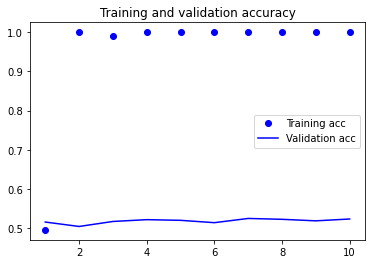

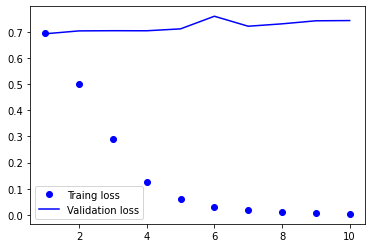

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_accuracy =history.history["val_acc"]
loss =history.history["loss"]
val_loss =history.history["val_loss"]

epochs= range(1,len(accuracy)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_accuracy, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Traing loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()
plt.show()

# 가중치 저장

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/model200.h5')

# 테스트 모델

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels=[]
texts =[]

for label_type in ["neg", "pos"]:
  dir_name =os.path.join(test_dir, label_type) # label 타입을 neg pos로 분류 
  for fname in os.listdir(dir_name):
    if fname[-4:] ==".txt":
      f =open(os.path.join(dir_name, fname), encoding='utf-8')
      texts.append(f.read()) # fname읽어서 texts에 넣음 
      f.close()
      if label_type =="neg":
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts) # 텍스트를 시퀀스로 바꿈 
x_test =pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/model200.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7398 - acc: 0.5264


[0.7398288249969482, 0.5263599753379822]

# 과제 training_samles =2000로 적용해서 위의 과제룰 수행하세요

In [ ]:
# 데이터 토근화
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen =100
training_samples =2000# traing samples를 소규모로 잡음 
validation_samples =10000
max_words =10000 # 가장 많이 쓰는 단어 10000개 

tokenizer =Tokenizer(num_words =max_words) # 토크나이저로 토근화 
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts) # 텍스트를 시퀀스로 바꿈 

word_index =tokenizer.word_index # 워드인덱스에 다 담음 
len(word_index) #워드 인덱스 길이 

87393

In [ ]:
import numpy as np
data =pad_sequences(sequences, maxlen=maxlen) # 길이 통일화  길이를 100으로 잡음 
labels =np.asarray(labels)
print(data.shape, labels.shape) # 길이가 100으로 됨 

(25000, 100) (25000,)


In [ ]:
# 훈련 세트와 검정 세트 분할 

indices =np.arange(data.shape[0])
np.random.shuffle(indices)
data= data[indices]
labels =labels[indices]
#-------------------셔플로 썩음 

x_train =data[:training_samples] # 소규모로 2000개 
y_train =labels[:training_samples] # 소규모 2000개 
x_val =data[training_samples:training_samples+validation_samples] # 2000개 ~ 2000+10000 총 10000개임 
y_val =labels[training_samples:training_samples+validation_samples]

In [ ]:
glove_dir = '/content/drive/MyDrive/Colab Notebooks'

embeddings_index ={}
f= open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
  values =line.split() # 각라인을 나움 
  if len(values) < 10:
    print(values)
  word =values[0]  # 0번째 가 word
  coefs =np.asarray(values[1:],dtype='float32')# 1부터 끝
  embeddings_index[word] =coefs #
f.close()

print(len(embeddings_index)) #임베딩된것 400000개 

400000


In [ ]:
embedding_dim = 100

embedding_matrix =np.zeros((max_words, embedding_dim)) # 임베딩 메트릭스를 0으로 채운다.
for word, i in word_index.items():
  embedding_vector =embeddings_index.get(word) #
  if i < max_words: # 번호는 맥스워드 보다 낮은 것으로한다. 
    if embedding_vector is not None:
      embedding_matrix[i]= embedding_vector

In [ ]:
# 모델 정의하기 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.layers[0].set_weights([embedding_matrix]) # 처음만들어놓은 model.add(Embedding(max_words))는 입력에만 들어가고
                                                # 동결 시킨후에 위에서 만들어 놓은 Embedding을 쓴다. 
model.layers[0].trainable =False                # 

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

model.compile(optimizer ='rmsprop', loss ='binary_crossentropy', metrics=['acc'])

history =model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
# val 10000개임 ,training을 적게해서 acc의 값이 높게 나온다. 

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_8 (Flatten)         (None, 10000)             0         
                                                                 
 dense_17 (Dense)            (None, 32)                320032    
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
63/63 [==============================] - 2s 26ms/step - loss: 0.6858 - acc: 0.5565 - val_loss: 0.6655 - val_acc: 0.6053
Epoch 2/10
63/63 [==========================

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/model2000.h5')

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels=[]
texts =[]

for label_type in ["neg", "pos"]:
  dir_name =os.path.join(test_dir, label_type) # label 타입을 neg pos로 분류 
  for fname in os.listdir(dir_name):
    if fname[-4:] ==".txt":
      f =open(os.path.join(dir_name, fname), encoding='utf-8')
      texts.append(f.read()) # fname읽어서 texts에 넣음 
      f.close()
      if label_type =="neg":
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts) # 텍스트를 시퀀스로 바꿈 
x_test =pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/model2000.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8199 - acc: 0.7676


[0.8199284672737122, 0.7676399946212769]